In [79]:
import numpy as np
import pandas as pd

# Part 1: moves resulting in food being eaten after 10 and 50 generations

In [80]:
data = pd.DataFrame(  # These results were manually copied from the 'Observer tab in netlogo'
    data=[[1462, 58859], [2372, 56620]],
    index=["Gen 11", "Gen 51"],
    columns=["Moves resulting in food eaten", "Moves not resulting in food eaten"],
)
data

,Moves resulting in food eaten,Moves not resulting in food eaten
Gen 11,1462,58859
Gen 51,2372,56620


In [81]:
from scipy.stats import chi2_contingency

print(chi2_contingency(data).pvalue)
print(chi2_contingency(data).pvalue < 0.05)
print(chi2_contingency(data).pvalue < 0.01)

4.986119766767448e-55
True
True


# Part 2: distribution of food eaten per tick

Readings taken at generation 50

In [82]:
ticks = np.genfromtxt("ticks.txt")
ticks = ticks[~np.isnan(ticks)]

<Axes: ylabel='Count'>

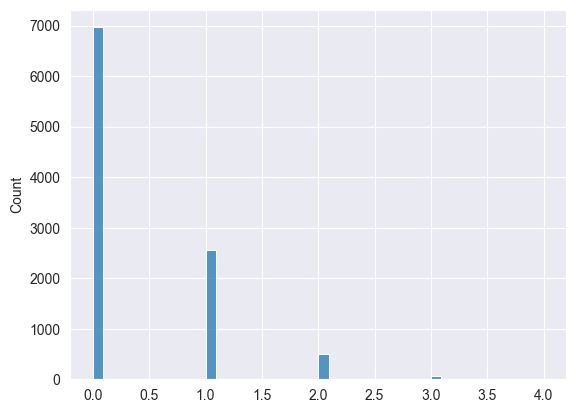

In [83]:
import seaborn as sns

sns.histplot(ticks)

In [84]:
print(f"Mean number of plants eaten: {np.mean(ticks)}")
print(f"Variance: {np.var(ticks)}")

Mean number of plants eaten: 0.3738604835513278
Variance: 0.3791542207254103


## It can be seen that while the mean and variance aren't exactly equal (to an extent beyond floating point arithmetic error), they are close, suggesting that this distribution will resemble a poisson distribution

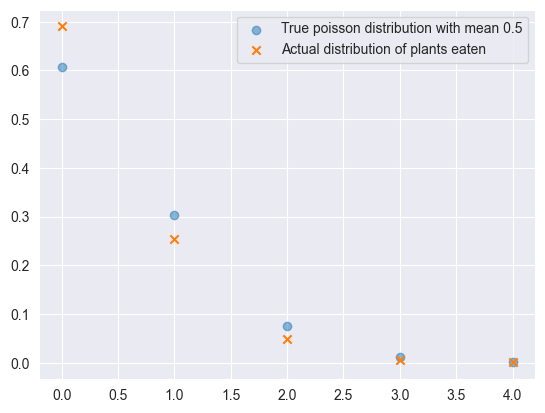

In [85]:
import math
import matplotlib.pyplot as plt

x_axis = np.arange(0, 5, 1)


def poisson(x, mu):
    return ((mu**x) * np.exp(-1 * mu)) / (math.factorial(x))


y = [poisson(x, 0.5) for x in x_axis]
plt.scatter(x_axis, y, label="True poisson distribution with mean 0.5", alpha=0.5)
unique_tick_counts = np.unique(ticks)
food_per_tick_probabilities = [
    len(ticks[ticks == count]) / len(ticks) for count in unique_tick_counts
]
plt.scatter(
    unique_tick_counts,
    food_per_tick_probabilities,
    label="Actual distribution of plants eaten",
    marker="x",
)
plt.legend()

# Visually, the distribution matches that of a poisson distribution with the same mean